In [164]:
%matplotlib inline

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from biopandas.pdb import PandasPDB as PandasPDB
from IPython.display import display


from IPython.display import display

from math import sqrt

In [4]:
protein_1 = PandasPDB().read_pdb("./2dor.pdb")

In [227]:
hetatms = protein_1.df["HETATM"]

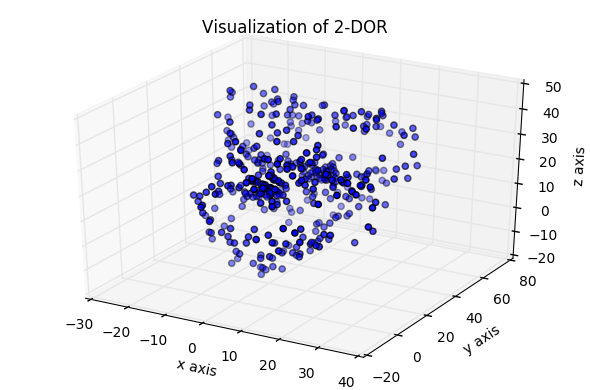

In [228]:
# display the protein for kicks
x_vals = hetatms['x_coord']
y_vals = hetatms['y_coord']
z_vals = hetatms['z_coord']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_vals, y_vals, z_vals)

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")
ax.set_title("Visualization of 2-DOR")

plt.tight_layout()
plt.show()


In [259]:
def make_distance_comparator(origin, x_thresh=None, y_thresh=None, z_thresh=None):
    """
        Creates a function to that determines the distance between two heatms in the dataframe
        :param pandas.core.series.Series origin: the origin point, specified as a x, y, z, tuple
        :param float x_thresh: threshold in x-axis
        :param float y_thresh: threshold in y-axis
        :param float y_thresh: threshold in z-axis
        :returns np.float64: the Euclidean distance squared of a point to the origin, or -1 if the point falls outside
            our x, y, or z constraints

        NOTE: x_thresh, y_thresh, and z_thresh represent a "bounding box" on points we're willing to consider
    """
    keys = ["x_coord", "y_coord", "z_coord"]
    x_o, y_o, z_o = origin[keys]
    
    # either no thresholds are specified, or they all are
    all_thresh_none = x_thresh is None and y_thresh is None and z_thresh is None
    all_thresh_given = x_thresh is not None and y_thresh is not None and z_thresh is not None

    if (not all_thresh_none and not all_thresh_given):
        raise ValueError("Need to either specify no thresholds, or all of them.")

    def distance_comparator(point, do_fast=False):
        """
            Returns the Euclidean Distance between two points in 3D space
            :param pandas.core.Series.Series point: the point we want to get the distance for
            :param bool do_fast: We can slightly speed up the computation by skipping the sqrt in the distance
            comparision, and considering only the Euclidean distance squared. Set this to true if you'd
            like to enable this
        """
        
        x, y, z = point[keys]
        if all_thresh_given:
            if abs(x - x_o) > x_thresh or abs(y - y_o) > y_thresh or abs(z - z_o) > z_thresh:
                return np.NaN

        euclid_dist_squared = (x - x_o) ** 2 + (y - y_o) ** 2 + (z - z_o) ** 2
        if not euclid_dist_squared:
            return np.NaN
        
        if do_fast:
            return euclid_dist_squared
        else:
            return sqrt(euclid_dist_squared)

    return distance_comparator

In [260]:
# quick test of above closure
initial_point = hetatms.iloc[2]
test_point = hetatms.iloc[1]
distance_func = make_distance_comparator(initial_point)
distance_func(test_point)

1.2126446305492802

In [293]:
# Core loop to get relevant data

INVALID_DISTANCE = -1
ORIGIN_DISTANCE = 0


neighbors = []

coords = hetatms[["x_coord", "y_coord", "z_coord"]]

for row_idx in range(len(coords)):
    atom = coords.iloc[row_idx]
    distance_func = make_distance_comparator(atom)

    # reduce the dataframe of x,y,z to distance from the selected atom
    distance_from_atom_df = hetatms.apply(distance_func, axis=1)
    hetatms["distance"] = distance_from_atom_df

    valid_atom_indices = hetatms["distance"].notnull()
    valid_key_hetatms = hetatms[valid_atom_indices].sort_values(by=["distance"], ascending=True)
    neighbors.append((hetatms["atom_number"].iloc[row_idx], valid_key_hetatms.index.tolist()))


In [ ]:
results = {}
results["pdb_name"] = "2DOR"
results["neighbors"] = neighbors

In [ ]:
with open("2dor.txt", "w") as f:
    f.write("PDB Name: {}\n".format(results["pdb_name"]))
    f.write("Neighbors:\n")
    
    count = 1
    for key_hetratm_number, neighbors_df in results["neighbors"]:
        f.write("\tKEY HETRATM {}: {}\n\t{}\n".format(count, key_hetratm_number, neighbors_df.to_string(index=False)))
        count += 1



In [310]:
hetatms[hetatms.residue_name == "FMN"]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx,distance
0,HETATM,4821,,N1,,FMN,,A,312,,...,47.844,17.842,1.0,15.87,,,N,NaN,5233,54.197287
1,HETATM,4822,,C2,,FMN,,A,312,,...,48.743,18.292,1.0,18.77,,,C,NaN,5234,55.026929
2,HETATM,4823,,O2,,FMN,,A,312,,...,48.658,19.353,1.0,16.99,,,O,NaN,5235,55.130860
3,HETATM,4824,,N3,,FMN,,A,312,,...,49.807,17.446,1.0,19.56,,,N,NaN,5236,55.814547
4,HETATM,4825,,C4,,FMN,,A,312,,...,50.027,16.187,1.0,21.17,,,C,NaN,5237,55.842979
5,HETATM,4826,,O4,,FMN,,A,312,,...,50.996,15.530,1.0,19.63,,,O,NaN,5238,56.600809
6,HETATM,4827,,C4A,,FMN,,A,312,,...,48.983,15.821,1.0,19.91,,,C,NaN,5239,54.909395
7,HETATM,4828,,N5,,FMN,,A,312,,...,49.133,14.579,1.0,17.84,,,N,NaN,5240,54.922167
8,HETATM,4829,,C5A,,FMN,,A,312,,...,48.321,14.248,1.0,19.57,,,C,NaN,5241,54.278136
9,HETATM,4830,,C6,,FMN,,A,312,,...,48.562,13.060,1.0,18.70,,,C,NaN,5242,54.451893


In [315]:
temp = set(hetatms.atom_number)

temp2 = {4821, 4824}

print(temp & temp2)

{4824, 4821}


In [317]:
for k in hetatms.atom_number:
    print(k)

4821
4822
4823
4824
4825
4826
4827
4828
4829
4830
4831
4832
4833
4834
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846
4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020


In [324]:
temp = hetatms[hetatms.atom_number == 4834]
temp

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx,distance
13,HETATM,4834,,C8M,,FMN,,A,312,,...,46.003,13.355,1.0,14.64,,,C,NaN,5246,52.728086
